In [2]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing 

In [3]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import BatchNormalization
from keras.utils import pad_sequences
from keras.utils import np_utils
from keras_preprocessing.sequence import pad_sequences
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D, Input
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff



In [4]:
train = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin1') 
test = pd.read_csv('Corona_NLP_test.csv', encoding = 'latin1')

In [5]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
train.shape

(41157, 6)

In [7]:
label = train['Sentiment'].unique()
label

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


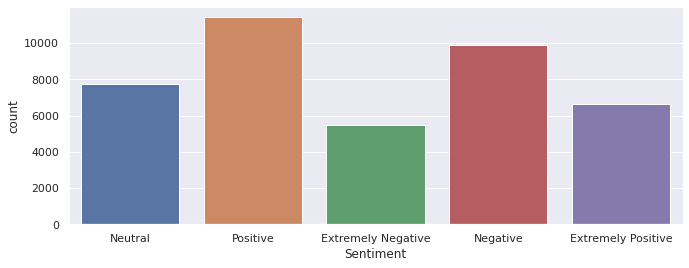

In [8]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,4)})
sns.countplot(train['Sentiment'])

**Remove Stop words from train and test**

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
train['OriginalTweet'].apply(lambda x: [item for item in x if item not in stop])
test['OriginalTweet'].apply(lambda x: [item for item in x if item not in stop])

0       [T, R, E, N, D, I, N, G, :,  , N, e, w,  , Y, ...
1       [W, h, e, n,  , I,  , c, u, l, n, ',  , f, n, ...
2       [F, n,  , u,  , h, w,  , u,  , c, n,  , p, r, ...
3       [#, P, n, c,  , b, u, n, g,  , h,  , #, N, e, ...
4       [#, l, e, p, p, e, r,  , #, u, n, n, p, p, e, ...
                              ...                        
3793    [M, e, n, w, h, l, e,  , I, n,  , A,  , S, u, ...
3794    [D,  , u,  , p, n, c,  , b, u,  ,  , l,  , f, ...
3795    [A,  , P, r, f,  , f,  , E, c, n, c,  , @, c, ...
3796    [G, v,  , n, e, e,  ,  ,  , e, h, n, g,  , n, ...
3797    [I,  , n,  , @, F, r, e, n, P, p, e, r,  , e, ...
Name: OriginalTweet, Length: 3798, dtype: object

# Convert categorical variable into dummy/indicator variables.


In [11]:
y=train['Sentiment'].values
y = pd.get_dummies(y)
print('Shape of label :', y)

Shape of label :        Extremely Negative  Extremely Positive  Negative  Neutral  Positive
0                       0                   0         0        1         0
1                       0                   0         0        0         1
2                       0                   0         0        0         1
3                       0                   0         0        0         1
4                       1                   0         0        0         0
...                   ...                 ...       ...      ...       ...
41152                   0                   0         0        1         0
41153                   1                   0         0        0         0
41154                   0                   0         0        0         1
41155                   0                   0         0        1         0
41156                   0                   0         1        0         0

[41157 rows x 5 columns]


# Tokenization
Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

Here, we use keras.processing class Tokenizer.



# Encoding Data


We would tokenize our entire data, so I'd create a new dataframe combining the tweet values of both train and test data, and fit our tokenizer on this new dataframe.

Now, having initalized a tokenizer in the previous step, we would now use the tokenizer to convert the text from train dataset to tokens, and pad the values with 0s to ensure a uniform length.

In [12]:
tmp = train['OriginalTweet'] + test['OriginalTweet']
tmp = tmp.astype(str)
tokenizer = text.Tokenizer(num_words=400000,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ")
max_len = 70
tokenizer.fit_on_texts(tmp)
word_index = tokenizer.word_index
len(word_index)

24677

In [13]:
X = train['OriginalTweet'].values
X = tokenizer.texts_to_sequences(X)
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=max_len)
print('Shape of data tensor:', X.shape)
 

Shape of data tensor: (41157, 70)


# Splitting the data
We would split up our train dataset into xtrain, xvalid, ytrain and yvalid. 



In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                  random_state=46, 
                                                  test_size=0.3, shuffle=True)

In [15]:
print('x_train.shape: ' + str(x_train.shape),' y_train.shape: '+str(y_train.shape))
print('x_test.shape: ' + str(x_test.shape),' y_train.shape: '+str(y_test.shape))


x_train.shape: (28809, 70)  y_train.shape: (28809, 5)
x_test.shape: (12348, 70)  y_train.shape: (12348, 5)


# The Embedding Layer


> Word embeddings are in fact a class of techniques where individual words are represented as real-valued vectors in a predefined vector space. Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network, and hence the technique is often lumped into the field of deep learning.



using pre trained Glove vectors


In [16]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2023-01-09 20:41:51--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2023-01-09 20:41:52--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2023-01-09 20:41:52--  https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/

In [17]:
!unzip glove.840B.300d.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [18]:
embeddings_index = {}
f = open('glove.840B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

2196017it [02:52, 12733.74it/s]

Found 2196016 word vectors.


In [19]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 24677/24677 [00:00<00:00, 390814.19it/s]


# Model Building

This is the part where it gets interesting. After all the process of cleaning, tokenizing, embedding words, we're now ready to create our model and feed the data into it and check which model gives a better accuracy.

**1. Simple RNN (Recurrent Neural Networks) Model**

We'll start off with a very simple RNN model. If you're new to the concept of tensorflow, have a [quick look](https://www.tensorflow.org/tutorials/quickstart/beginner)

Let's first address the question. 

What is RNN?

Recurrent neural networks (RNN) are a class of neural networks that are helpful in modeling sequence data. Derived from feedforward networks, RNNs exhibit similar behavior to how human brains function. Simply put: recurrent neural networks produce predictive results in sequential data that other algorithms can’t.


In [ ]:
SimpleRNNModel = Sequential()
SimpleRNNModel.add(Input(shape=x_train.shape[1]))
SimpleRNNModel.add(Embedding(len(tokenizer.word_index)+1,32))
SimpleRNNModel.add(SimpleRNN(100))
SimpleRNNModel.add(Dense(5, activation='softmax'))
#SimpleRNNModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
SimpleRNNModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
SimpleRNNModel.summary()

# Fitting the data


In [ ]:

SimpleRNNModelResults = SimpleRNNModel.fit(x_train, y_train, epochs=5, batch_size=64,validation_split=0.1)


# Overfitting Model Alert!
So, I see the accuracy is quite high ~95%, and also high precision, recall and AUC but the val_accuracy is not that great. This means that there might be a possibility of overfitting, where in the model performs well with the train data, but while performing with new data which it isn't trained with, it might not be performing quite well. 



**Preprocessing the test dataset**

**2. LSTM (Long Short Term Memory) Networks**

> Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points, but also entire sequences of data.

Technically, LSTM was built to overcome the [vanishing gradient](https://medium.datadriveninvestor.com/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577) issue encountered in RNNs. In simple words, RNN training is something like this. From each layer, the error is backpropagated to update the weights of previous layers, but in a case where the gradient is exponentially so less, that it becomes insignificant and the weights are not updated at all. We call this as the *vanishing gradient* problem.

I'd first try with a simple LSTM model, with a very similar architecture as of the simple RNN model and check how much accuracy that gives us.

In [ ]:
SimpleLSTMModel = Sequential()
SimpleLSTMModel.add(Input(shape=x_train.shape[1]))
SimpleLSTMModel.add(Embedding(len(tokenizer.word_index)+1,32))
SimpleLSTMModel.add(LSTM(100))
SimpleLSTMModel.add(Dense(5, activation='softmax'))
SimpleLSTMModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
SimpleLSTMModel.summary()

In [ ]:

SimpleLSTMModelResults = SimpleLSTMModel.fit(x_train, y_train, epochs=5, batch_size=64,validation_split=0.1)


the improvement is noticable changing the model from Simple RNN to LSTM and no overfitting

**3. GRU Gated Recurrent Units**

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

In [ ]:
SimpleGRUModel = Sequential()
SimpleGRUModel.add(Input(shape=x_train.shape[1]))
SimpleGRUModel.add(Embedding(len(tokenizer.word_index)+1,32))
SimpleGRUModel.add(GRU(100))
SimpleGRUModel.add(Dense(5, activation='softmax'))
SimpleGRUModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
SimpleGRUModel.summary()

In [ ]:

SimpleGRUModelResults = SimpleGRUModel.fit(x_train, y_train, epochs=5, batch_size=64,validation_split=0.1)


**4. Bidirectional LSTM Model**

The Bidirectional LSTM or BiLSTM is a modified version of a simple LSTM, where we use 2 LSTM models, one processing the input and learning occuring in a forward direction and one for backward. It is proven better in terms of accuracy than traditional RNN/GRU and LSTM.


In [ ]:
BILSTMModel_2 = Sequential()
BILSTMModel_2.add(Input(shape=x_train.shape[1]))
BILSTMModel_2.add(Embedding(24678,300, weights=[embedding_matrix]))
BILSTMModel_2.add(Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))
BILSTMModel_2.add(GlobalMaxPooling1D())
BILSTMModel_2.add(Dense(50, activation='relu'))
BILSTMModel_2.add(Dropout(0.2))
BILSTMModel_2.add(Dense(5, activation='softmax'))
BILSTMModel_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
BILSTMModel_2.summary()

In [ ]:
BILSTMModelResults = BILSTMModel_2.fit(x_train, y_train, epochs=5, batch_size=64,validation_split=0.1)


Epoch 1/5
406/406 [==============================] - 260s 620ms/step - loss: 1.1338 - accuracy: 0.5246 - val_loss: 0.8025 - val_accuracy: 0.6935
Epoch 2/5
406/406 [==============================] - 229s 564ms/step - loss: 0.6898 - accuracy: 0.7590 - val_loss: 0.6444 - val_accuracy: 0.7650
Epoch 3/5
406/406 [==============================] - 230s 566ms/step - loss: 0.5338 - accuracy: 0.8241 - val_loss: 0.6448 - val_accuracy: 0.7730
Epoch 4/5
406/406 [==============================] - 223s 550ms/step - loss: 0.4378 - accuracy: 0.8583 - val_loss: 0.6444 - val_accuracy: 0.7688
Epoch 5/5
406/406 [==============================] - 223s 549ms/step - loss: 0.3599 - accuracy: 0.8876 - val_loss: 0.7132 - val_accuracy: 0.7567
